# HW-8

### Xichen Li, EE521 - Group 5

#### A) Xichen Li: I did HW8 independently. 

#### Chapter-12 P3 :
Plot the density of states as a function of Energy for a GaAs wire with a $6nm*6nm$ square cross-section. In plotting the DOS, choose a point located at the center of the square crosssection. Show the DOS contribution due to each sub-band and the total DOS. Include at least the three lowest sub-bands in the conduction band and the three highest sub-bands in the
valence band. Assume that the effective mass of electrons and holes are $0.067m_o$ and $0.47m_o$, respectively.

#### Answer
In a 1-D nanowire nanostructure, the DOS in the conduction band is:
$$DOS_c(x,y,z,E)=\frac{4}{L_1L_2}\frac{1}{\pi\hbar}\sum_{l,m}sin^2(\frac{l\pi}{L_1}x)sin^2(\frac{m\pi}{L_2}y)\sqrt{\frac{m_c}{2(E-E_c-\epsilon_{l,m})}}u(E-E_c-\epsilon_{l,m})$$ 
where $\epsilon_{l,m}=\frac{\hbar^2}{2m_c}(\frac{l\pi}{L_1})^2+\frac{\hbar^2}{2m_c}(\frac{m\pi}{L_2})^2$. Here we consider the three lowest sub-band in the conduction band where $(l,m)=(1,1),(1,2),(2,1), (1,3),(3,1),(2,2), (3,3)$.

Similar to the derviation for DOS in the conduction band, the DOS in the valence band is:
$$DOS_v(x,y,z,E)=\frac{4}{L_1L_2}\frac{1}{\pi\hbar}\sum_{l',m'}sin^2(\frac{l'\pi}{L_1}x)sin^2(\frac{m'\pi}{L_2}y)\sqrt{\frac{m_c}{2(E_v-\epsilon_{l',m'}-E)}}u(E_v-\epsilon_{l',m'}-E)$$ 
The question is ask to choose a point at the center of the square cross section, thus $x=y=\frac{L}{2}=3nm$. <br>
The density of states in conduction band and valence band as a function of energy are plotted using the code below. 

(0.0, 10.0)

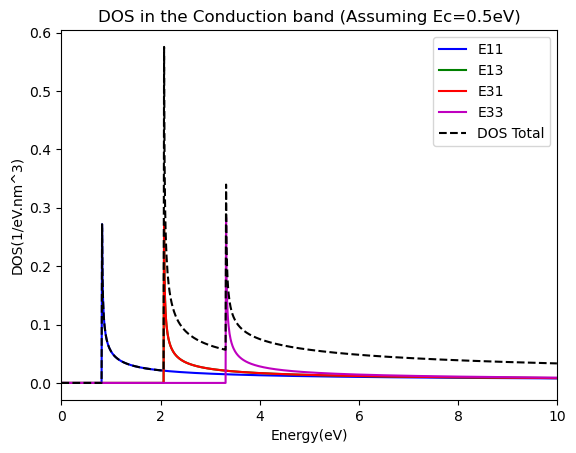

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
eta = 6.63e-34/2/np.pi #Reduced Plank constant in eV.s
q = 1.6e-19
L1=6e-9
L2=L1
x=L1/2
mo = 9.11e-31   
mc=0.067*mo
mv=0.47*mo
Ec=0.5*q
BG=1.42*q #bandgap of the bulk semiconductor

Eend=10*q
dE=0.1e-1*q
E=np.arange(0,Eend,dE)

def u(X):
    U=[]
    for x in X:
        if x >0 :
          result = 1
        else:
          result = 0
        U=np.append(U,result)
    return U     

def SQRT(X):
    U=[]
    for x in X:
        if x >0 :
          result = np.sqrt(x)
        else:
          result = 0
        U=np.append(U,result)
    return U 

C1=4/(L1*L2)*1/(np.pi*eta)
#Density of State in the conduction band
eps11=eta**2/(2*mc)*(1*np.pi/L1)**2+eta**2/(2*mc)*(1*np.pi/L2)**2
DOSc11=C1*((np.sin(1*np.pi*x/L1))**2)*((np.sin(1*np.pi*x/L1))**2)*SQRT(mc/(2*(E-Ec-eps11)))*u(E-Ec-eps11)

eps12=eta**2/(2*mc)*(1*np.pi/L1)**2+eta**2/(2*mc)*(2*np.pi/L2)**2
DOSc12=C1*((np.sin(1*np.pi*x/L1))**2)*((np.sin(2*np.pi*x/L1))**2)*SQRT(mc/(2*(E-Ec-eps12)))*u(E-Ec-eps12)

eps21=eta**2/(2*mc)*(2*np.pi/L1)**2+eta**2/(2*mc)*(1*np.pi/L2)**2
DOSc21=C1*((np.sin(2*np.pi*x/L1))**2)*((np.sin(1*np.pi*x/L1))**2)*SQRT(mc/(2*(E-Ec-eps21)))*u(E-Ec-eps21)

eps22=eta**2/(2*mc)*(2*np.pi/L1)**2+eta**2/(2*mc)*(2*np.pi/L2)**2
DOSc22=C1*((np.sin(2*np.pi*x/L1))**2)*((np.sin(2*np.pi*x/L1))**2)*SQRT(mc/(2*(E-Ec-eps22)))*u(E-Ec-eps22)

eps13=eta**2/(2*mc)*(1*np.pi/L1)**2+eta**2/(2*mc)*(3*np.pi/L2)**2
DOSc13=C1*((np.sin(1*np.pi*x/L1))**2)*((np.sin(3*np.pi*x/L1))**2)*SQRT(mc/(2*(E-Ec-eps13)))*u(E-Ec-eps13)

eps31=eta**2/(2*mc)*(3*np.pi/L1)**2+eta**2/(2*mc)*(1*np.pi/L2)**2
DOSc31=C1*((np.sin(3*np.pi*x/L1))**2)*((np.sin(1*np.pi*x/L1))**2)*SQRT(mc/(2*(E-Ec-eps31)))*u(E-Ec-eps31)

eps33=eta**2/(2*mc)*(3*np.pi/L1)**2+eta**2/(2*mc)*(3*np.pi/L2)**2
DOSc33=C1*((np.sin(3*np.pi*x/L1))**2)*((np.sin(3*np.pi*x/L1))**2)*SQRT(mc/(2*(E-Ec-eps33)))*u(E-Ec-eps33)

DOSc=DOSc11+DOSc12+DOSc21+DOSc22+DOSc13+DOSc31+DOSc33

plt.figure()
plt.plot(E/q, DOSc11*q/1e27, color='b', ls='-')
#plt.plot(E/q, DOSc12*q/1e27, color='b', ls='-')
#plt.plot(E/q, DOSc21*q/1e27, color='b', ls='-')
#plt.plot(E/q, DOSc22*q/1e27, color='b', ls='-')
plt.plot(E/q, DOSc13*q/1e27, color='g', ls='-')
plt.plot(E/q, DOSc31*q/1e27, color='r', ls='-')
plt.plot(E/q, DOSc33*q/1e27, color='m', ls='-')
plt.plot(E/q, DOSc*q/1e27, color='k', ls='--')

plt.legend(['E11', 'E13','E31','E33','DOS Total'])
plt.title('DOS in the Conduction band (Assuming Ec=0.5eV)')
plt.xlabel('Energy(eV)')
plt.ylabel('DOS(1/eV.nm^3)')
plt.xlim(0, Eend/q)


(-5.0, 0.0)

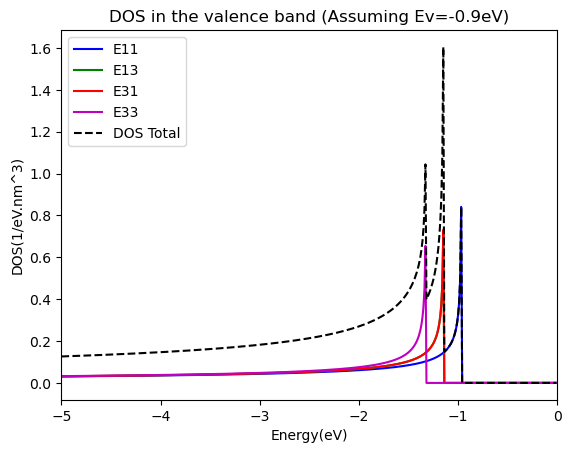

In [4]:
Ev=Ec-BG 

Estartv=-5*q
dE=0.1e-1*q
E1=np.arange(Estartv,0,dE)

#Density of State in the conduction band
epsv11=eta**2/(2*mv)*(1*np.pi/L1)**2+eta**2/(2*mv)*(1*np.pi/L2)**2
DOSv11=C1*((np.sin(1*np.pi*x/L1))**2)*((np.sin(1*np.pi*x/L1))**2)*SQRT(mv/(2*(Ev-epsv11-E1)))*u(Ev-epsv11-E1)

epsv12=eta**2/(2*mv)*(1*np.pi/L1)**2+eta**2/(2*mv)*(2*np.pi/L2)**2
DOSv12=C1*((np.sin(1*np.pi*x/L1))**2)*((np.sin(2*np.pi*x/L1))**2)*SQRT(mv/(2*(Ev-epsv12-E1)))*u(Ev-epsv12-E1)

epsv21=eta**2/(2*mv)*(2*np.pi/L1)**2+eta**2/(2*mv)*(1*np.pi/L2)**2
DOSv21=C1*((np.sin(2*np.pi*x/L1))**2)*((np.sin(1*np.pi*x/L1))**2)*SQRT(mv/(2*(Ev-epsv21-E1)))*u(Ev-epsv21-E1)

epsv22=eta**2/(2*mv)*(2*np.pi/L1)**2+eta**2/(2*mv)*(2*np.pi/L2)**2
DOSv22=C1*((np.sin(2*np.pi*x/L1))**2)*((np.sin(2*np.pi*x/L1))**2)*SQRT(mv/(2*(Ev-epsv22-E1)))*u(Ev-epsv22-E1)

epsv13=eta**2/(2*mv)*(1*np.pi/L1)**2+eta**2/(2*mv)*(3*np.pi/L2)**2
DOSv13=C1*((np.sin(1*np.pi*x/L1))**2)*((np.sin(3*np.pi*x/L1))**2)*SQRT(mv/(2*(Ev-epsv13-E1)))*u(Ev-epsv13-E1)

epsv31=eta**2/(2*mv)*(3*np.pi/L1)**2+eta**2/(2*mv)*(1*np.pi/L2)**2
DOSv31=C1*((np.sin(3*np.pi*x/L1))**2)*((np.sin(1*np.pi*x/L1))**2)*SQRT(mv/(2*(Ev-epsv31-E1)))*u(Ev-epsv31-E1)

epsv33=eta**2/(2*mv)*(3*np.pi/L1)**2+eta**2/(2*mv)*(3*np.pi/L2)**2
DOSv33=C1*((np.sin(3*np.pi*x/L1))**2)*((np.sin(3*np.pi*x/L1))**2)*SQRT(mv/(2*(Ev-epsv33-E1)))*u(Ev-epsv33-E1)

DOSv=DOSv11+DOSv12+DOSv21+DOSv22+DOSv13+DOSv31+DOSv33

plt.figure()
plt.plot(E1/q, DOSv11*q/1e27, color='b', ls='-')
plt.plot(E1/q, DOSv13*q/1e27, color='g', ls='-')
plt.plot(E1/q, DOSv31*q/1e27, color='r', ls='-')
plt.plot(E1/q, DOSv33*q/1e27, color='m', ls='-')
plt.plot(E1/q, DOSv*q/1e27, color='k', ls='--')

plt.legend(['E11', 'E13','E31','E33','DOS Total'])
plt.title('DOS in the valence band (Assuming Ev=-0.9eV)')
plt.xlabel('Energy(eV)')
plt.ylabel('DOS(1/eV.nm^3)')
plt.xlim(Estartv/q, 0)

#### Chapter-13 P1 :
Calculate the electron and hole density in a 1-D nanowire with a bandgap of $1 eV$. The effective mass of the conduction and valence bands is the free electron mass $m_o$. By assuming that there is only a single subband in the nanowire’s conduction and valence bands, (a) write down the expression for calculating the electron and hole densities and simplify it as much as possible, and (b) calculate a numerical value for the electron and hole densities by assuming that the Fermi energy is $200 meV$ below the nanowire’s conduction band.

#### Answer
##### Part (a) 
The electron density in the conduction band is:
$$n_e(r)=\int_{E_{c,min}}^{E_{c,max}}DOS_c(r,E)f(E)dE$$
In a 1-D nanowire nanostructure, the DOS in the conduction band is:
$$DOS_c(x,y,z,E)=\frac{4}{L_1L_2}\frac{1}{\pi\hbar}\sum_{l,m}sin^2(\frac{l\pi}{L_1}x)sin^2(\frac{m\pi}{L_2}y)\sqrt{\frac{m_c}{2(E-E_c-\epsilon_{l,m})}}u(E-E_c-\epsilon_{l,m})$$ 
where $\epsilon_{l,m}=\frac{\hbar^2}{2m_c}(\frac{l\pi}{L_1})^2+\frac{\hbar^2}{2m_c}(\frac{m\pi}{L_2})^2$. By assuming that there is only a single subband in the nanowire's conduction bands according to the problem description, we assume $l=m=1$. Then the DOS in the conduction band is:
$$DOS_c(x,y,z,E)=\frac{4}{L_1L_2}\frac{1}{\pi\hbar}sin^2(\frac{\pi}{L_1}x)sin^2(\frac{\pi}{L_2}y)\sqrt{\frac{m_c}{2(E-E_c-\epsilon_{1,1})}}u(E-E_c-\epsilon_{1,1})$$ 
where $\epsilon_{1,1}=\frac{\hbar^2}{2m_c}[(\frac{\pi}{L_1})^2+(\frac{\pi}{L_2})^2]$.


Defining $A=\frac{4}{L_1L_2}\frac{1}{\pi\hbar}\sqrt{m_c}$, then the electron density is:
$$n_e(x,y)=Asin^2(\frac{\pi}{L_1}x)sin^2(\frac{\pi}{L_2}y)\int_{E_{c,min}}^{E_{c,max}}\sqrt{\frac{1}{2(E-E_c-\epsilon_{1,1})}}u(E-E_c-\epsilon_{1,1})f(E)dE$$
Defining $E_{c,1}=E_c+\epsilon_{1,1}$,
$$n_e(x,y)=Asin^2(\frac{\pi}{L_1}x)sin^2(\frac{\pi}{L_2}y)\int_{E_{c,1}}^{\infty}\sqrt{\frac{1}{2(E-E_{c,1})}}f(E)dE$$
where $f(E)=\frac{1}{1+e^{\frac{E-E_F}{k_BT}}}$, then $n_e(x,y)$ becomes:
$$n_e(x,y)=Asin^2(\frac{\pi}{L_1}x)sin^2(\frac{\pi}{L_2}y)\int_{E_{c,1}}^{\infty}\sqrt{\frac{1}{2(E-E_{c,1})}}\frac{1}{1+e^{\frac{E-E_F}{k_BT}}}dE$$

Change of varaibles: $\eta=\frac{E-E_{c,1}}{k_BT}$ and $\eta_{C1}=\frac{E_F-E_{c,1}}{k_BT}$, then $n_e(x,y)$ becomes:
$$n_e(x,y)=Asin^2(\frac{\pi}{L_1}x)sin^2(\frac{\pi}{L_2}y)(\frac{1}{2}k_BT)^{1/2}\int_{0}^{\infty}\eta^{-\frac{1}{2}}\frac{1}{(1+e^{\eta-\eta_{C1}})}d\eta$$

Similar to the lecture note, when $\eta-\eta_{C1}>3$, $n_e(x,y)$ can be written as:
$$n_e(x,y)=Asin^2(\frac{\pi}{L_1}x)sin^2(\frac{\pi}{L_2}y)(\frac{1}{2}k_BT)^{1/2}\int_{0}^{\infty}\eta^{-\frac{1}{2}}e^{-(\eta-\eta_{C1})}d\eta$$
$$n_e(x,y)=Asin^2(\frac{\pi}{L_1}x)sin^2(\frac{\pi}{L_2}y)(\frac{1}{2}k_BT)^{1/2}e^{\eta_{C1}}\int_{0}^{\infty}\eta^{-\frac{1}{2}}e^{-\eta}d\eta$$

Change of variables again to solve the integral $u=\eta^{\frac{1}{2}}$:
$$n_e(x,y)=Asin^2(\frac{\pi}{L_1}x)sin^2(\frac{\pi}{L_2}y)(\frac{1}{2}k_BT)^{1/2}e^{\eta_{C1}}\int_{0}^{\infty}2e^{-u^2}du$$

The Gauss error function has a form of $erf(x)=\frac{2}{\sqrt \pi}\int_{0}^{x}e^{-t^2}dt$, then $n_e(x,y)$ becomes
$$n_e(x,y)=Asin^2(\frac{\pi}{L_1}x)sin^2(\frac{\pi}{L_2}y)(\frac{1}{2}k_BT)^{1/2}e^{\eta_{C1}}2\frac{\sqrt{\pi}}{2}erf(\infty)$$
Since $erf(\infty)=1$
$$n_e(x,y)=Asin^2(\frac{\pi}{L_1}x)sin^2(\frac{\pi}{L_2}y)(\frac{1}{2}k_BT)^{1/2}e^{\eta_{C1}}\sqrt{\pi}$$
The final expression of $n_e(x,y)$ is 
$$n_e(x,y)=\frac{4}{L_1L_2}sin^2(\frac{\pi}{L_1}x)sin^2(\frac{\pi}{L_2}y)\frac{1}{\pi\hbar}\sqrt{m_c}(\frac{1}{2}k_BT)^{1/2}e^{\frac{E_F-E_{c}-\frac{\hbar^2}{2m_c}(\frac{\pi}{L_1})^2-\frac{\hbar^2}{2m_c}(\frac{\pi}{L_2})^2}{k_BT}}\sqrt{\pi}$$

Similar to the electron density in the conduction band, the hole density in the valence band is :
$$n_h(r)=\int_{E_{v,min}}^{E_{v,max}}DOS_c(r,E)[1-f(E)]dE$$
After performing some simplifications and use $B=\frac{4}{L_1L_2}\frac{1}{\pi\hbar}\sqrt{m_v}$ , we can get:
$$n_h(x,y)=Bsin^2(\frac{\pi}{L_1}x)sin^2(\frac{\pi}{L_2}y)\int_{-\infty}^{E_{v,1}}\sqrt{\frac{1}{2(E_{v,1}-E)}}[1-f(E)]dE$$
where $E_{v,1}=E_v-\epsilon_{1,1}$, and again $\epsilon_{1,1}=\frac{\hbar^2}{2m_v}[(\frac{\pi}{L_1})^2+(\frac{\pi}{L_2})^2]$.
$$n_h(x,y)=Bsin^2(\frac{\pi}{L_1}x)sin^2(\frac{\pi}{L_2}y)\int_{-\infty}^{E_{v,1}}\sqrt{\frac{1}{2(E_{v,1}-E)}}[1-\frac{1}{1+e^{\frac{E-E_F}{k_BT}}}]dE$$

Change of varaibles: $\eta=\frac{E_{v,1}-E}{k_BT}$ and $\eta_{v1}=\frac{E_F-E_{v,1}}{k_BT}$, then $n_h(x,y)$ becomes:
$$n_h(x,y)=\frac{4}{L_1L_2}\frac{1}{\pi\hbar}\sqrt{m_v}sin^2(\frac{\pi}{L_1}x)sin^2(\frac{\pi}{L_2}y)(\frac{1}{2}k_BT)^{\frac{1}{2}}\int_{0}^{\infty}\eta^{-\frac{1}{2}}[\frac{1}{1+e^{-\eta-\eta_{v1}}}-1]d\eta$$

##### Part(b)
Becasue the bandgap of this nanowire is $1eV$ and the Fermi energy is $200 meV$ below the nanowire’s conduction band, so we have:
$$E_F-E_{c,1}=E_F-[E_{c}+\frac{\hbar^2}{2m_c}(\frac{\pi}{L_1})^2+\frac{\hbar^2}{2m_c}(\frac{\pi}{L_2})^2]=-200meV$$
$$E_F-E_{v1}=E_F-[E_v-\frac{\hbar^2}{2m_e}(\frac{\pi}{L_1})^2-\frac{\hbar^2}{2m_e}(\frac{\pi}{L_2})^2]=800meV$$

Then the electron density $n_e(x,y)$ at any specific location (x,y) in a naowire is:
$$n_e(x,y)=\frac{4}{L_1L_2}sin^2(\frac{\pi}{L_1}x)sin^2(\frac{\pi}{L_2}y)\frac{1}{\pi\hbar}\sqrt{m_c}(\frac{1}{2}k_BT)^{1/2}e^{\frac{-200meV}{k_BT}}\sqrt{\pi}$$

By assuming a room temperature $T=298K$, $k_BT=4.11*10^{-21}J$
$$n_e(x,y)=\frac{4}{L_1L_2}sin^2(\frac{\pi}{L_1}x)sin^2(\frac{\pi}{L_2}y)\frac{1}{\pi*6.63*10^{-34}/2/\pi}\sqrt{9.11*10^{-31}}(\frac{1}{2}4.11*10^{-21})^{1/2}e^{\frac{-0.2*1.6*10^{-19}}{4.11*10^{-21}}}\sqrt{\pi}$$

$$n_e(x,y)=\frac{1}{L_1L_2}sin^2(\frac{\pi}{L_1}x)sin^2(\frac{\pi}{L_2}y)*3.85*10^{5}/m$$


By using $E_F-E_{v1}=800meV$, the integral in the expression of the hole density is calculated using Matlab and the resulting $n_h(x,y)$ at any specific location (x,y) in a nanowire is:
$$n_h(x,y)=\frac{1}{L_1L_2}sin^2(\frac{\pi}{L_1}x)sin^2(\frac{\pi}{L_2}y)*(-2.76*10^{-5})/m$$